In [1]:
pip install wordcloud plotly seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
#EDA 
#Import Libraries
import pandas as pd #reading
import numpy as np #transformation
import matplotlib.pyplot as plt #visual
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [21]:
data = pd.read_csv('AppleData.csv')
data.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [23]:
data.shape

(4001, 9)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [27]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [31]:
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)

In [33]:
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        1
dtype: int64

In [35]:
#Convert Acidity Column
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [37]:
sns.set_theme(style='whitegrid', palette='deep')
sns.color_palette("Reds")

[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

In [39]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [41]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [45]:
num = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity']

In [55]:
ds = pd.DataFrame({
      'Mean': data[num].mean(),
      'Median': data[num].median(),
      'Mode': data[num].mode().iloc[0],
      'Variance': data[num].var(),
      'Standard Deviation': data[num].std(),
      'Skewness': data[num].skew(),
      'Kurtosis': data[num].kurt()
})

In [57]:
ds.head()

,Mean,Median,Mode,Variance,Standard Deviation,Skewness,Kurtosis
Size,-0.503015,-0.513703,-7.151703,3.717410,1.928059,-0.002437,-0.083341
Weight,-0.989547,-0.984736,-7.149848,2.568029,1.602507,0.003102,0.359050
Sweetness,-0.470479,-0.504758,-6.894485,3.776962,1.943441,0.083850,0.014472
Crunchiness,0.985478,0.998249,-6.055058,1.967728,1.402757,0.000230,0.722020
Juiciness,0.512118,0.534219,-5.961897,3.726003,1.930286,-0.113421,0.028735


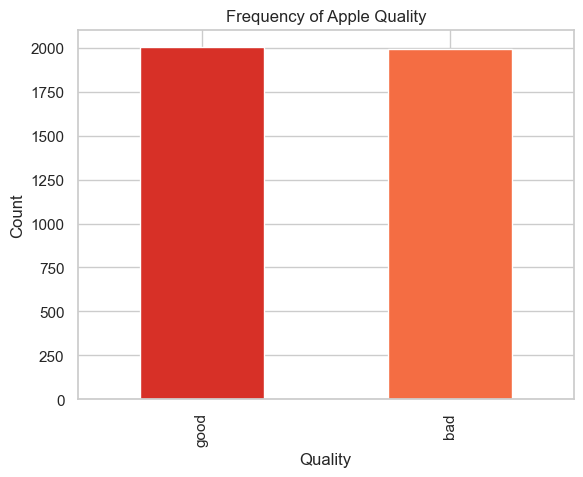

In [61]:
#Frequency distribution of quality
quality_counts = data['Quality'].value_counts()
quality_counts.plot(kind='bar', title='Frequency of Apple Quality', color=['#d73027', '#f46d43'])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

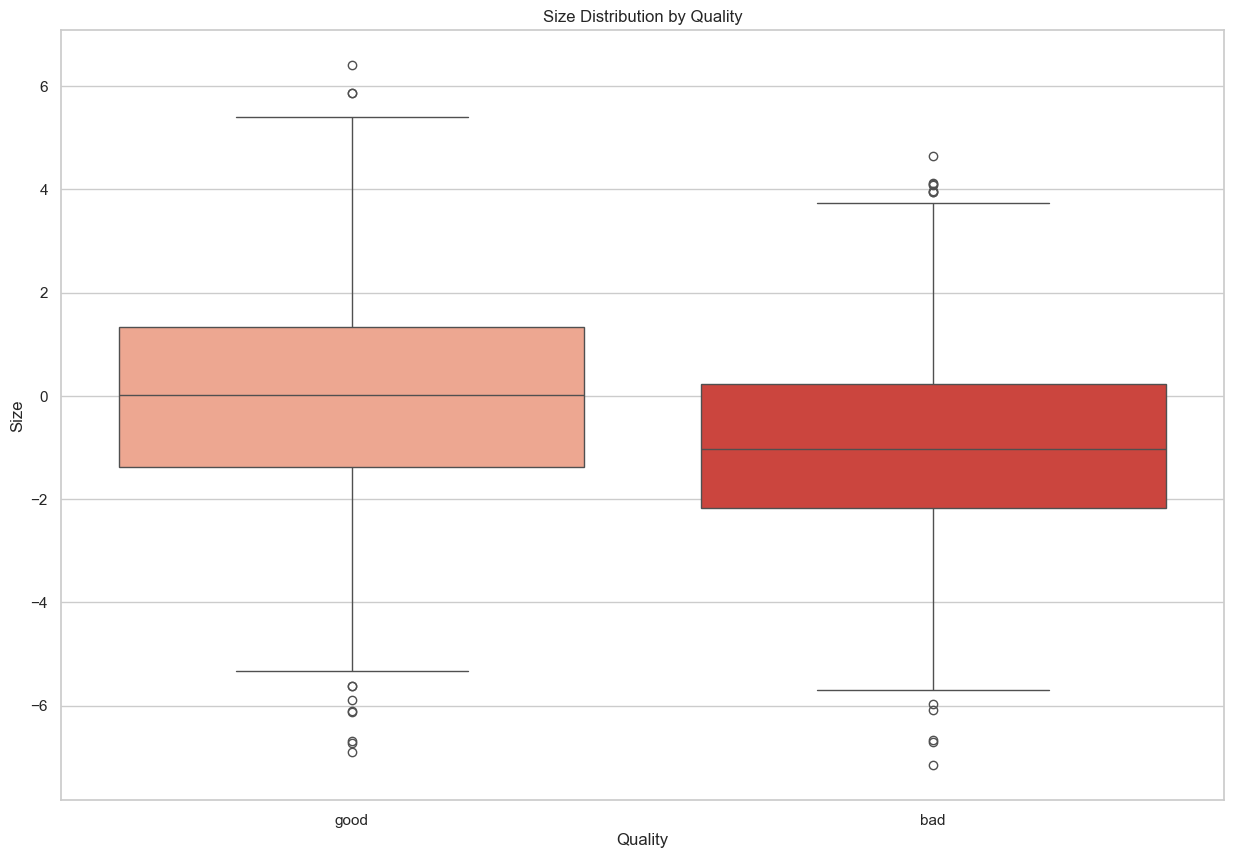

In [76]:
#Visualization
plt.figure(figsize=(15, 10))
sns.boxplot(x='Quality', y='Size', data=data, hue='Quality', palette='Reds', legend=False)
plt.title('Size Distribution by Quality')
plt.show()

Correlation Matrix:
                  Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   

              Acidity  
Size         0.196218  
Weight       0.016414  
Sweetness    0.085999  
Crunchiness  0.069943  
Juiciness    0.248714  
Ripeness    -0.202669  
Acidity      1.000000  


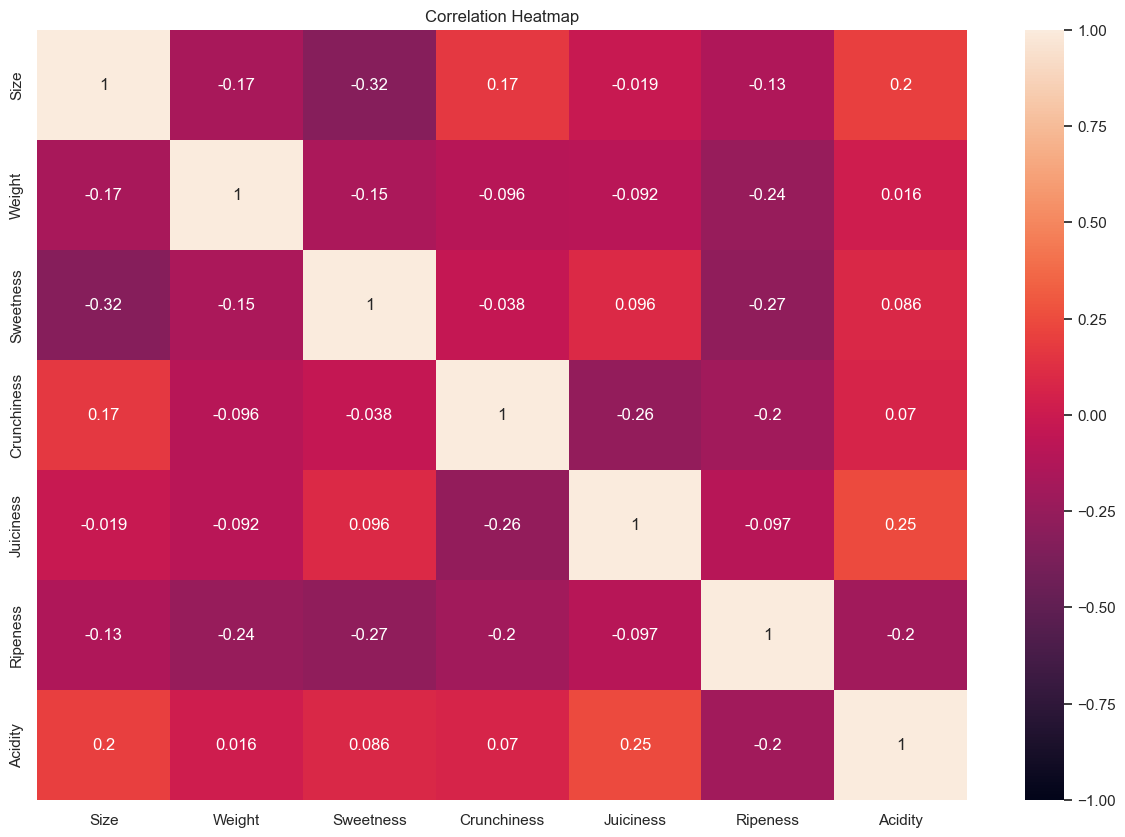

In [82]:
# Check for constant column and remove them
valid_numeric_columns = [col for col in num if data[col].nunique() > 1]

# Generate detailed descriptive sstatistics for numeric columns
descriptive_stats = data[valid_numeric_columns].describe()

# Compute correlation only for numeric columns
correlation_matrix = data[valid_numeric_columns].corr()

# Debugging step: print correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Generate heatmap if correlation matrix is not empty
if not correlation_matrix.isnull().all().all():
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No valid correlation to display. All columns may contain constant values or Nans.")

In [84]:
#Split the data
good = data[data['Quality'] == 'good']
bad = data[data['Quality'] == 'bad']

# T-Test
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

ttest_results = {
    col: ttest_ind(good[col], bad[col], equal_var=False, nan_policy='omit')
    for col in valid_numeric_columns
}
for col, result in ttest_results.items():
    print(f'{col}: t-statistics = {result.statistic:.4f}, p_value = {result.pvalue:.4f}')

Size: t-statistics = 15.9130, p_value = 0.0000
Weight: t-statistics = 0.0899, p_value = 0.9284
Sweetness: t-statistics = 16.3964, p_value = 0.0000
Crunchiness: t-statistics = -0.7831, p_value = 0.4336
Juiciness: t-statistics = 17.0348, p_value = 0.0000
Ripeness: t-statistics = -17.3259, p_value = 0.0000
Acidity: t-statistics = -0.4866, p_value = 0.6266


In [86]:
#Chi2 Test
table = pd.crosstab(data['Quality'], data['Acidity'] > data['Acidity'].mean())
chi2, chi_p, dof, expected = chi2_contingency(table)

print(f'Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

Chi-Square 0.5320864379290087, p-value 0.4657309961724613, Degree of Freedom 1


In [88]:
# Confidence Interval
ci = {}
cl = 0.95
z_score = norm.ppf((1+cl)/2)

for col in valid_numeric_columns:
    mean = data[col].mean()
    se = data[col].std() / np.sqrt(len(data[col]))
    me = z_score * se
    lb = mean - me
    up = mean + me
    ci[col] = (lb, up)
    print(f'{col}: Mean: {mean:.4f}, 95% CI Value: ({lb:.4f}, {up:.4f})')





Size: Mean: -0.5030, 95% CI Value: (-0.5628, -0.4433)
Weight: Mean: -0.9895, 95% CI Value: (-1.0392, -0.9399)
Sweetness: Mean: -0.4705, 95% CI Value: (-0.5307, -0.4103)
Crunchiness: Mean: 0.9855, 95% CI Value: (0.9420, 1.0289)
Juiciness: Mean: 0.5121, 95% CI Value: (0.4523, 0.5719)
Ripeness: Mean: 0.4983, 95% CI Value: (0.4402, 0.5564)
Acidity: Mean: 0.0769, 95% CI Value: (0.0115, 0.1423)


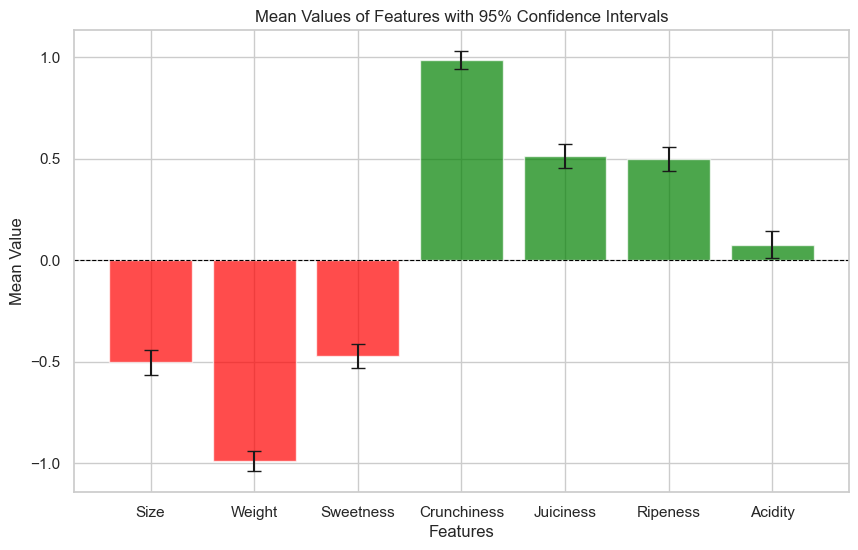

In [90]:
# Data
features = ["Size", "Weight", "Sweetness", "Crunchiness", "Juiciness", "Ripeness", "Acidity"]
means = [-0.5030, -0.9895, -0.4705, 0.9855, 0.5121, 0.4983, 0.0769]
ci_lower = [-0.5628, -1.0392, -0.5307, 0.9420, 0.4523, 0.4402, 0.0115]
ci_upper = [-0.4433, -0.9399, -0.4103, 1.0289, 0.5719, 0.5564, 0.1423]

# Compute error bars
errors = [np.abs(np.array(means) - np.array(ci_lower)), np.abs(np.array(ci_upper) - np.array(means))]

# Define colors: red for negative means, green for positive means
colors = ['red' if mean < 0 else 'green' for mean in means]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(features, means, yerr=errors, capsize=5, color=colors, alpha=0.7)

# Labels and title
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features with 95% Confidence Intervals")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")  # Add a horizontal line at y=0 for reference

# Show plot
plt.show()